# Alucar - Analisando as Vendas

In [674]:
import pandas as pd

In [675]:
alucar = pd.read_csv('dados/alucar.csv')

In [676]:
print('Quantidade de linhas e colunas:', alucar.shape)

Quantidade de linhas e colunas: (24, 2)


In [677]:
print('Quantidade de dados nulos:', alucar.isna().sum().sum())

Quantidade de dados nulos: 0


In [678]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [679]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [680]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [681]:
import seaborn as sns

In [682]:
print(sns.__version__)

0.10.0


In [683]:
%matplotlib inline

In [684]:
from matplotlib import pyplot as plt

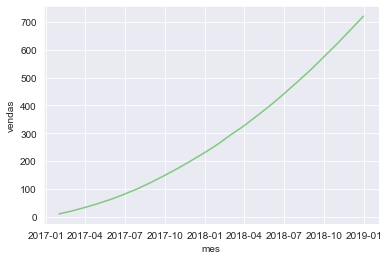

In [685]:
sns.lineplot(x='mes', y='vendas', data=alucar)

## Aperfeiçoando o Gráfico

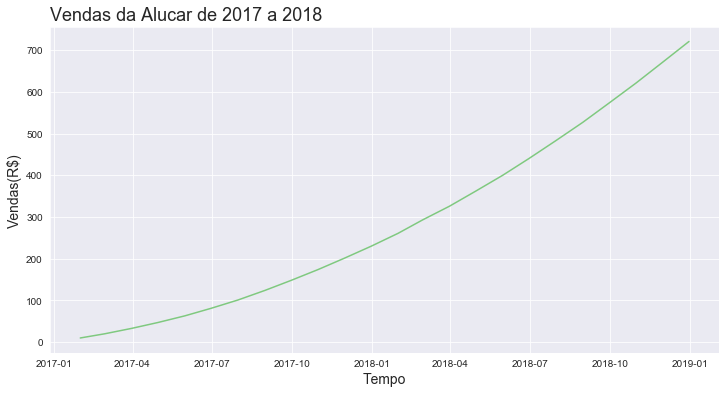

In [686]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas da Alucar de 2017 a 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas(R$)', fontsize=14)
ax = ax

## Decompondo as Vendas

In [687]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [688]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


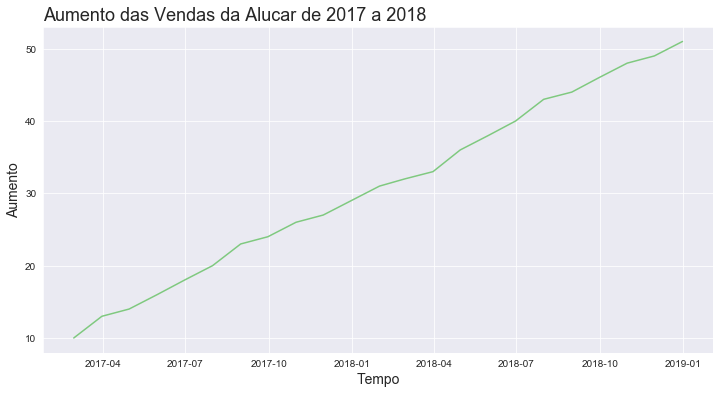

In [689]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das Vendas da Alucar de 2017 a 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

In [690]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

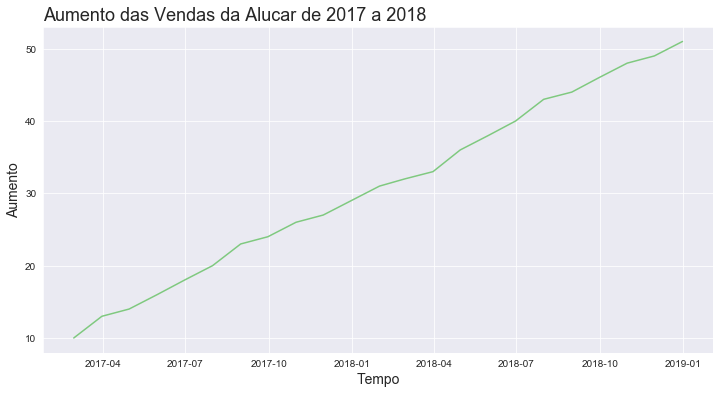

In [691]:
plotar('Aumento das Vendas da Alucar de 2017 a 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [692]:
alucar['aceleração'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleração
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


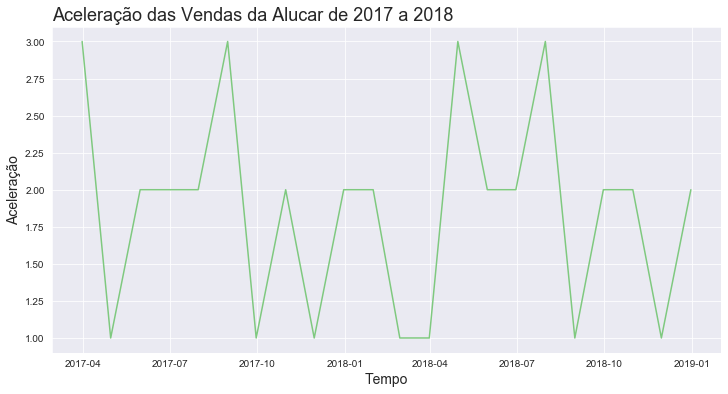

In [693]:
plotar('Aceleração das Vendas da Alucar de 2017 a 2018', 'Tempo', 'Aceleração', 'mes', 'aceleração', alucar)

## Observação e Tendências

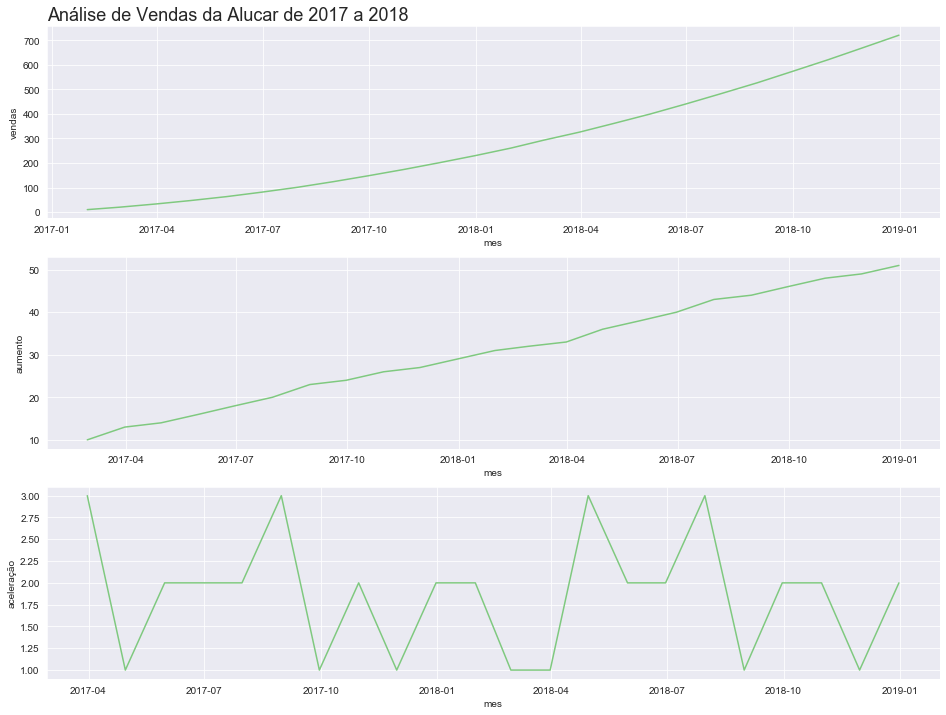

In [694]:
plt.figure(figsize = (16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de Vendas da Alucar de 2017 a 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleração', data=alucar)
ax=ax

In [695]:
def plot_comparação(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize = (16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax=ax

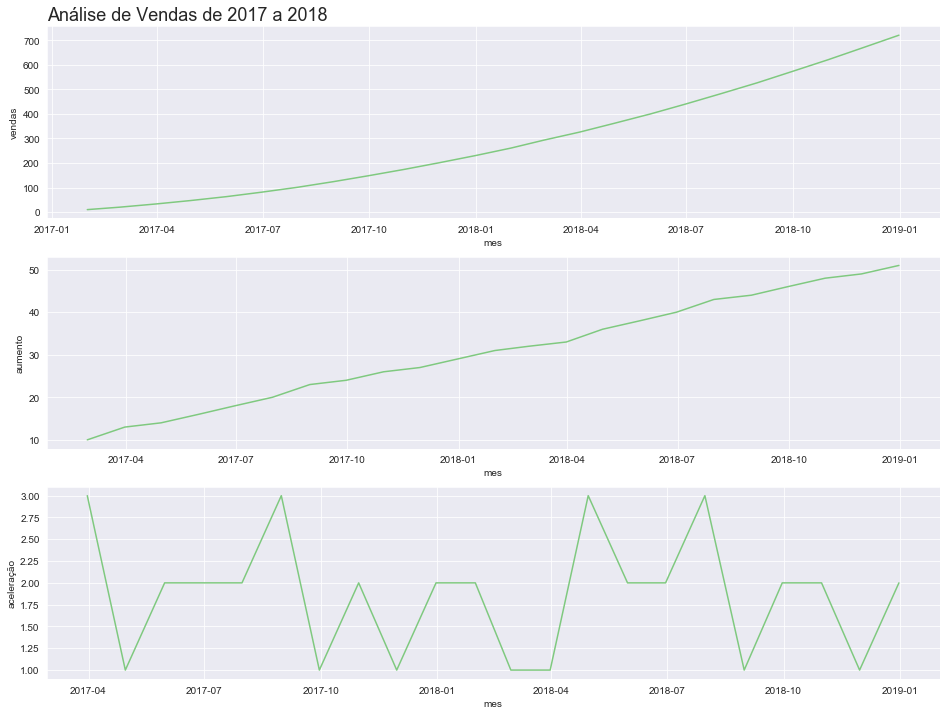

In [696]:
plot_comparação('mes', 'vendas', 'aumento', 'aceleração', alucar, 'Análise de Vendas de 2017 a 2018')

## Autocorrelação

In [697]:
from pandas.plotting import autocorrelation_plot

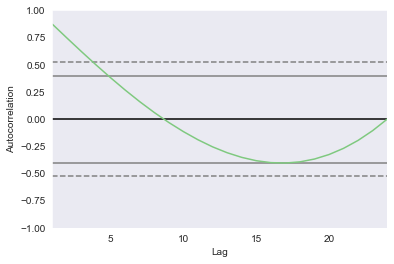

In [698]:
autocorrelation_plot(alucar['vendas'])

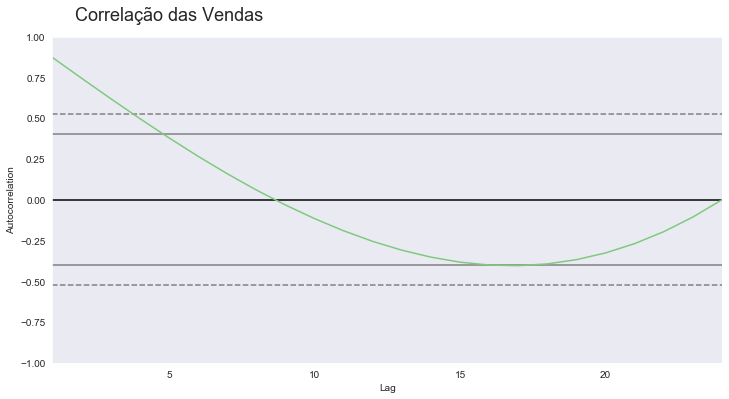

In [699]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax=ax

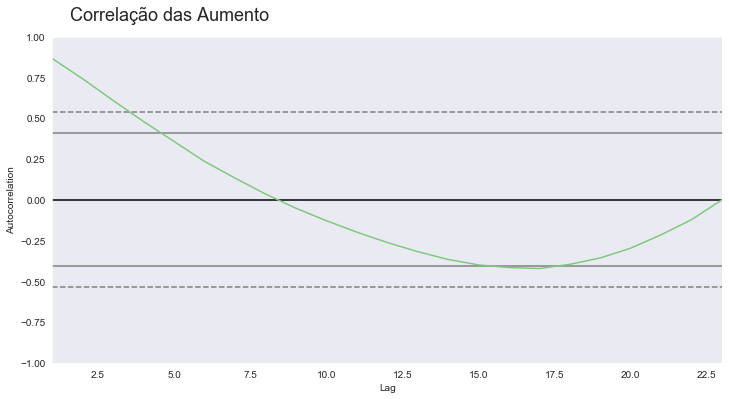

In [700]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax=ax

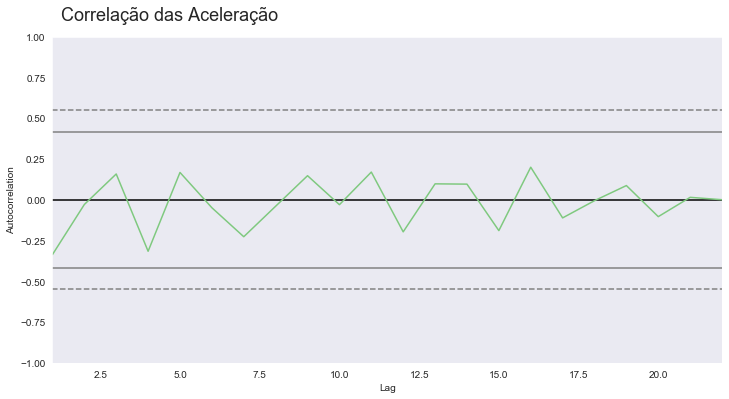

In [701]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleração'][2:])
ax=ax

# Alucar - Análisando assinantes da Newsletter

In [702]:
assinantes = pd.read_csv('dados/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [703]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [704]:
print('Quantidade de linhas e colunas:', assinantes.shape)
print('Quantidade de dados nulos: ', assinantes.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos:  0


In [705]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [706]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleração'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleração
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


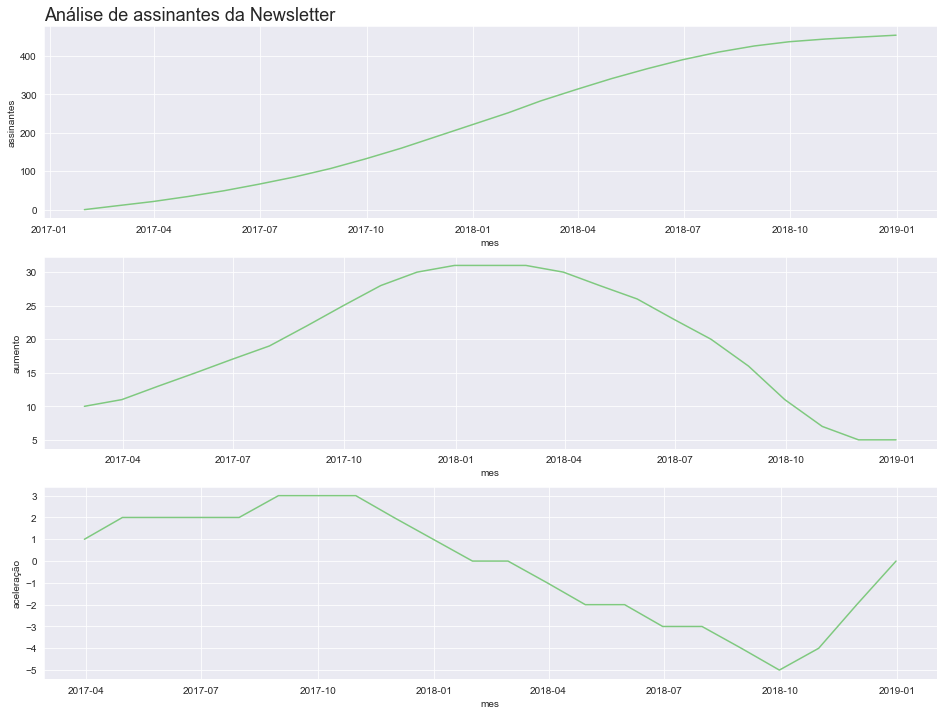

In [707]:
plot_comparação('mes', 'assinantes', 'aumento', 'aceleração', assinantes, 'Análise de assinantes da Newsletter')

# Sazonalidade e chocolate

## Chocolura - Análisando as Vendas

In [708]:
chocolura = pd.read_csv('dados/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [709]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [710]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [711]:
print('Quantidade de linhas e colunas: ', chocolura.shape)
print('Quantidade de dados nulos: ', chocolura.isna().sum().sum())

Quantidade de linhas e colunas:  (24, 2)
Quantidade de dados nulos:  0


In [712]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleração'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleração
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


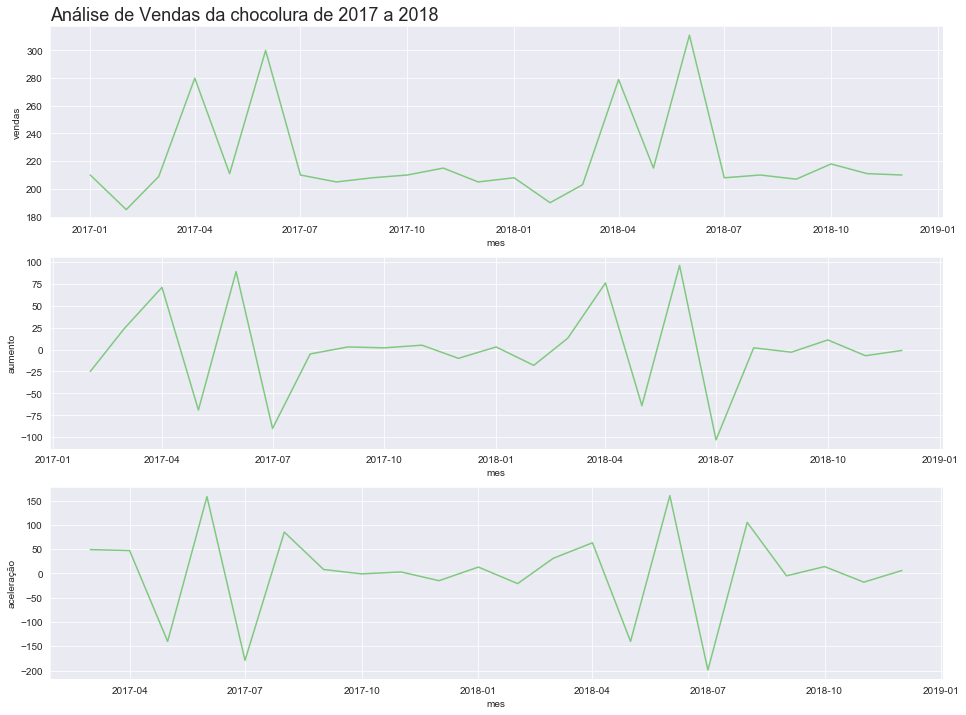

In [713]:
plot_comparação('mes', 'vendas', 'aumento', 'aceleração', chocolura, 'Análise de Vendas da chocolura de 2017 a 2018')

## Chocolura - Vendas Diárias (Outubro e Novembro)

In [714]:
vendas_por_dia = pd.read_csv('dados/vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [715]:
print('Quantidade de linhas e colunas: ', vendas_por_dia.shape)
print('Quantidade de dados nulos: ', vendas_por_dia.isna().sum().sum())

Quantidade de linhas e colunas:  (61, 2)
Quantidade de dados nulos:  0


In [716]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])

In [717]:
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [718]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleração'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleração
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


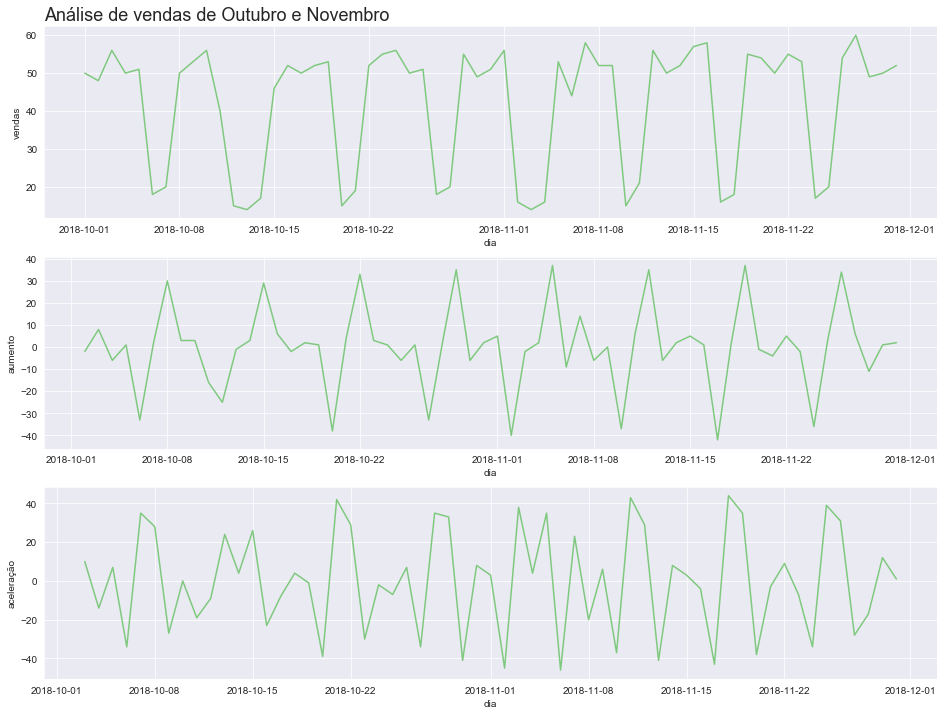

In [719]:
plot_comparação('dia', 'vendas', 'aumento', 'aceleração', vendas_por_dia, 'Análise de vendas de Outubro e Novembro')

## Análisando a sazonalidade

In [720]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleração
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


In [721]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [722]:
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleração,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [723]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [724]:
dias_traduzidos = {'Monday': 'Segunda', 'Tuesday': 'Terça', 'Wednesday': 'Quarta', 
                   'Thursday': 'Quinta', 'Friday': 'Sexta',
                   'Saturday': 'Sabado','Sunday':'Domingo'}

In [725]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleração,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo


## Agrupando os Dias

In [726]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')[['vendas', 'aumento', 'aceleração']].mean().round()


In [727]:
vendas_agrupadas

,vendas,aumento,aceleração
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terça,52.0,-1.0,-34.0


# Correlação das vendas diárias

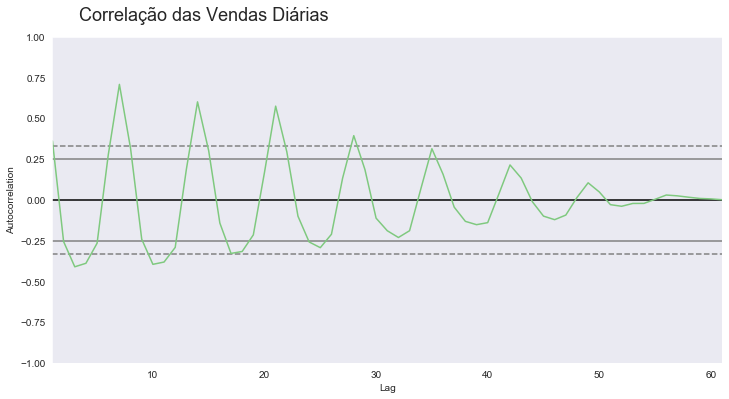

In [728]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação das Vendas Diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax=ax

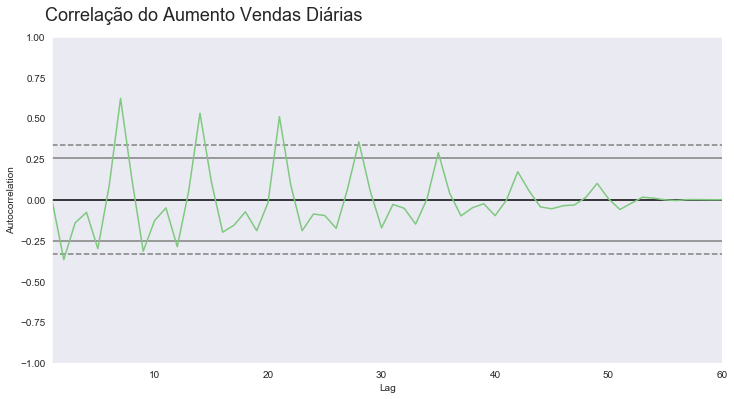

In [729]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação do Aumento Vendas Diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax=ax

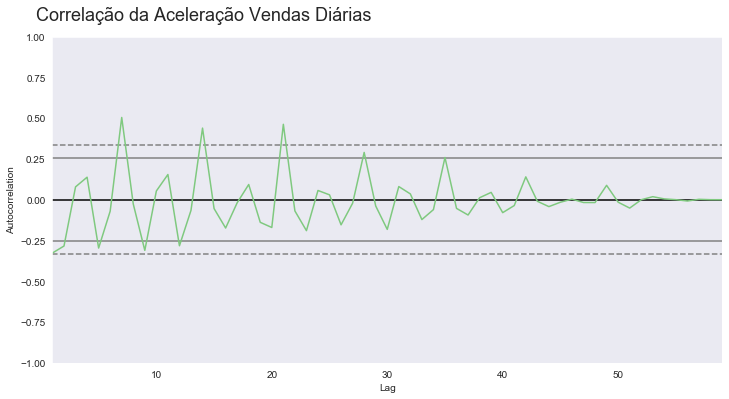

In [730]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação da Aceleração Vendas Diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleração'][2:])
ax=ax

# Cafelura - Análise de Vendas

In [731]:
cafelura = pd.read_csv('dados/cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [732]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [733]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])

In [734]:
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [735]:
print('Quantidade de linhas e colunas: ', cafelura.shape)
print('Quantidade de dados nulos: ', cafelura.isna().sum().sum())

Quantidade de linhas e colunas:  (24, 2)
Quantidade de dados nulos:  0


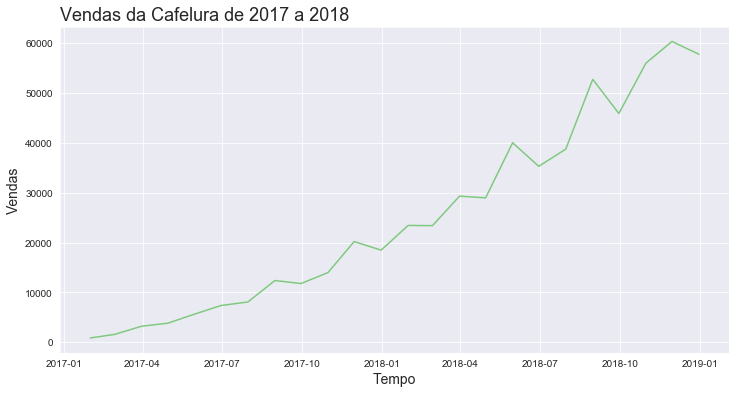

In [736]:
plotar('Vendas da Cafelura de 2017 a 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [737]:
quantidade_de_dias_de_fds = pd.read_csv('dados/dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [738]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [739]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values

In [740]:
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


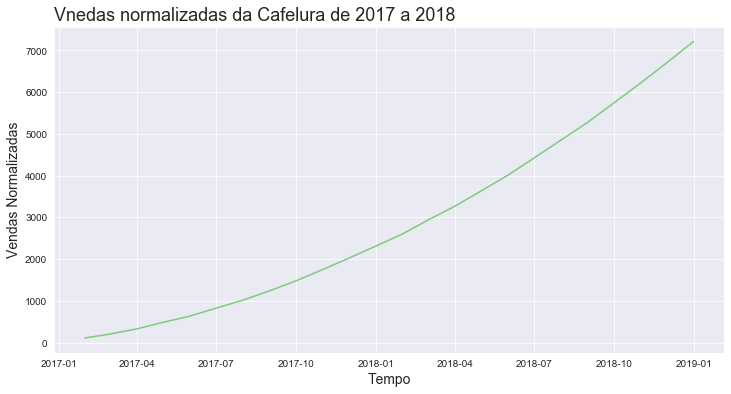

In [760]:
plotar('Vnedas normalizadas da Cafelura de 2017 a 2018', 
       'Tempo', 'Vendas Normalizadas', 'mes', 'vendas_normalizadas',
       cafelura)

# Statismodel

In [742]:
from statsmodels.tsa.seasonal import seasonal_decompose

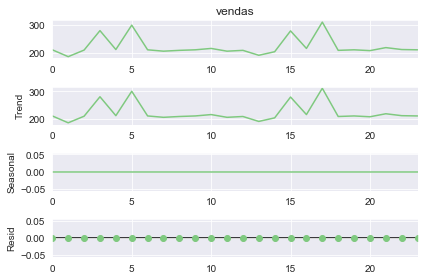

In [743]:
resultado = seasonal_decompose(chocolura['vendas'], period=1)
ax = resultado.plot()

In [744]:
observação = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [745]:
data = ({
    'observação': observação,
    'tendencia': tendencia,
    'sazonalidade': sazonalidade,
    'ruido': ruido
})

In [746]:
resultado = pd.DataFrame(data)
resultado.head()

,observação,tendencia,sazonalidade,ruido
0,210.0,210.0,0.0,0.0
1,185.0,185.0,0.0,0.0
2,209.0,209.0,0.0,0.0
3,280.0,280.0,0.0,0.0
4,211.0,211.0,0.0,0.0


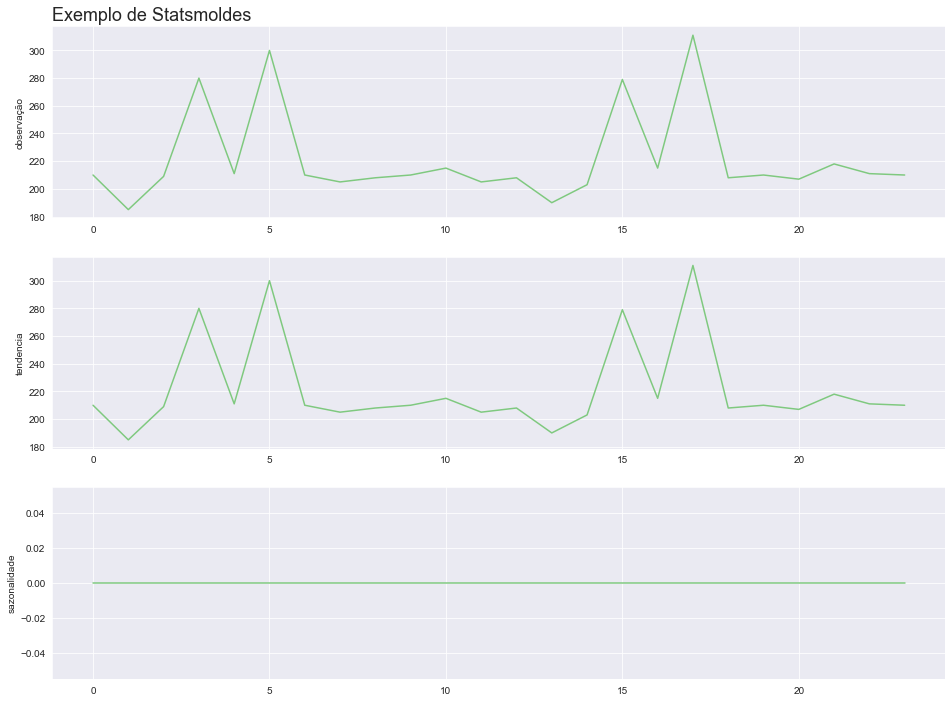

In [747]:
plot_comparação(resultado.index, 'observação', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmoldes')

# Ruido de uma Time Series

In [748]:
alucel = pd.read_csv('dados/alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [749]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [750]:
alucel['dia'] = pd.to_datetime(alucel['dia'])

In [751]:
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [752]:
print('Quantidade de linhas e colunas:', alucel.shape)
print('Quantidade de dados nulos:', alucel.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [753]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleração'] = alucel['aumento'].diff()

In [754]:
alucel.head()

,dia,vendas,aumento,aceleração
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


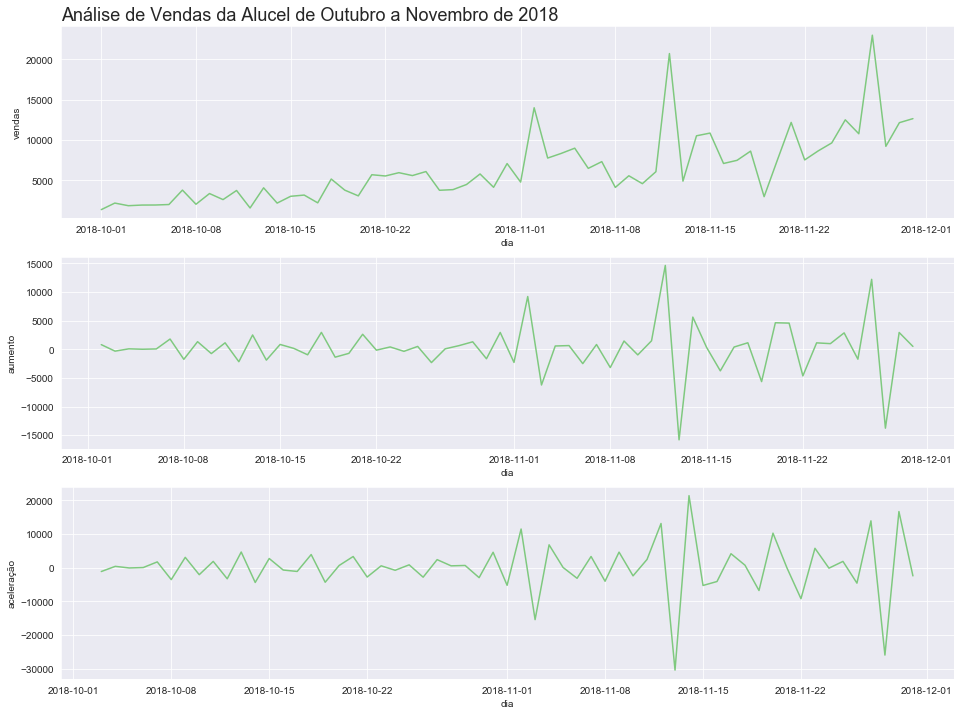

In [755]:
plot_comparação('dia', 'vendas', 'aumento', 'aceleração', alucel, 'Análise de Vendas da Alucel de Outubro a Novembro de 2018')

## Media Móvel

In [756]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [757]:
alucel.head(7)

,dia,vendas,aumento,aceleração,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


In [758]:
alucel

,dia,vendas,aumento,aceleração,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
...,...,...,...,...,...
56,2018-11-26,10773.53,-1726.46,-4587.84,9840.835714
57,2018-11-27,22984.56,12211.03,13937.49,12037.211429
58,2018-11-28,9216.26,-13768.30,-25979.33,11613.995714
59,2018-11-29,12147.61,2931.35,16699.65,12273.428571


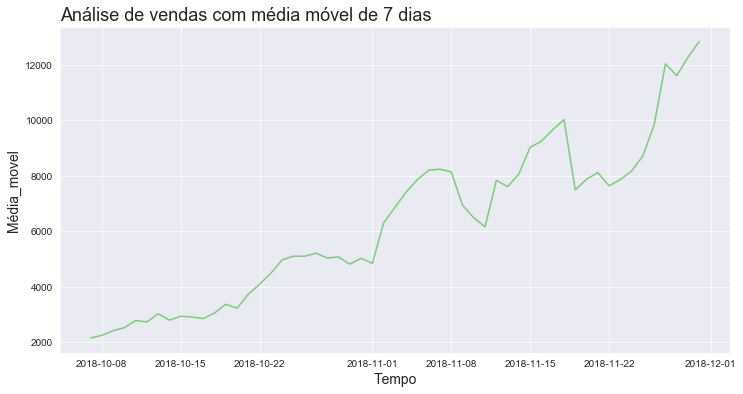

In [759]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média_movel', 'dia', 'media_movel', alucel)

In [761]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

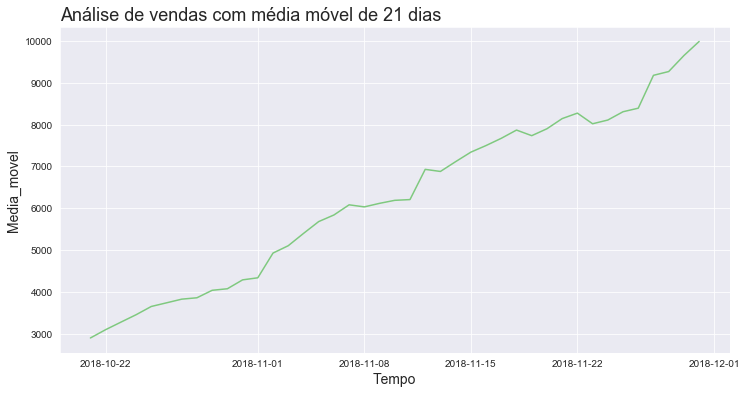

In [762]:
plotar('Análise de vendas com média móvel de 21 dias', 'Tempo', 'Media_movel', 'dia', 'media_movel_21', alucel)

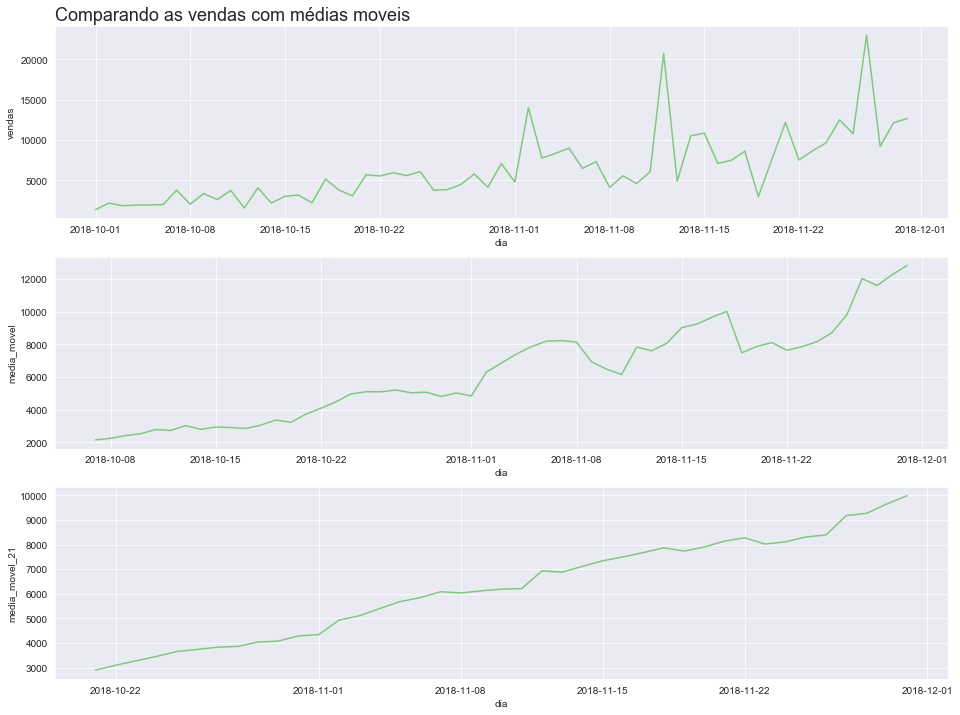

In [763]:
plot_comparação('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as vendas com médias moveis')